In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV 

import warnings
warnings.filterwarnings('ignore') 


In [31]:
df = pd.read_csv('UniversalBank.csv')
df.head() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [32]:
df.shape 

(5000, 14)

In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [34]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [35]:
df.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [36]:
df.duplicated().sum() 

np.int64(0)

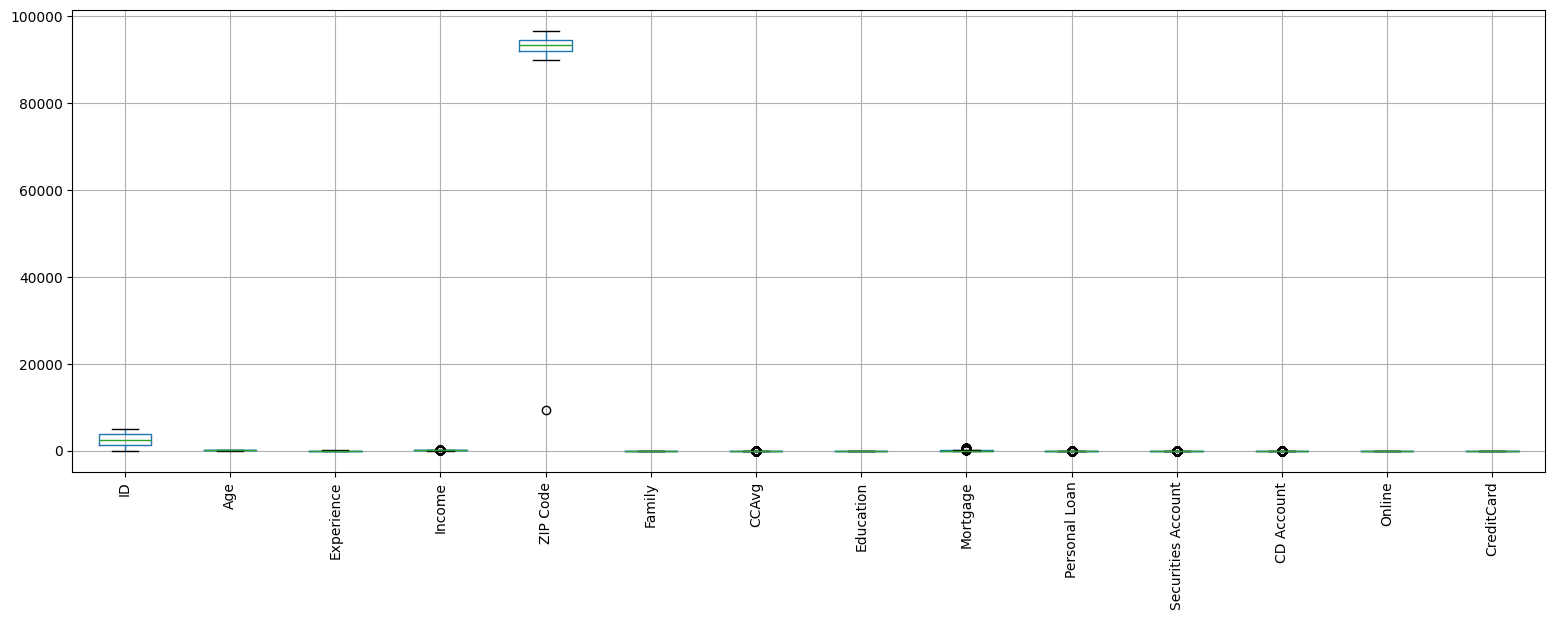

In [37]:
plt.figure(figsize=(19,6)) 

df.boxplot() 
plt.xticks(rotation=90) 
plt.show() 

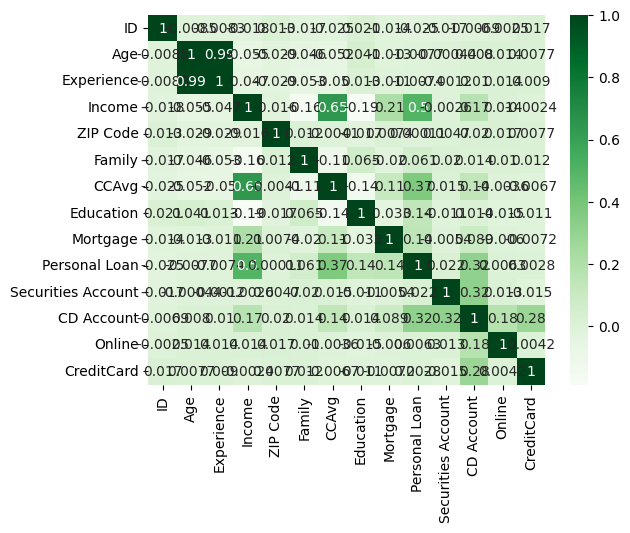

In [38]:
corr = df.corr() 

sns.heatmap(corr, annot=True, cmap='Greens')
plt.show() 

In [39]:
df['CreditCard'].value_counts() 

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [40]:
x = df.drop('CreditCard', axis=1)
y = df['CreditCard']

In [41]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 


In [42]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
x_train_sample, y_train_sample = sm.fit_resample(x_train, y_train) 

print(y_train.value_counts()) 
print(y_train_sample.value_counts()) 

CreditCard
0    2822
1    1178
Name: count, dtype: int64
CreditCard
0    2822
1    2822
Name: count, dtype: int64


In [43]:
from sklearn.svm import SVC 

model = SVC() 
model.fit(x_train_sample, y_train_sample) 

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_pred = model.predict(x_test)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
from sklearn.metrics import accuracy_score, classification_report 

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")
print(f"Classification report is: {classification_report(y_test, y_pred)}")

Accuracy is: 0.708
Classification report is:               precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000



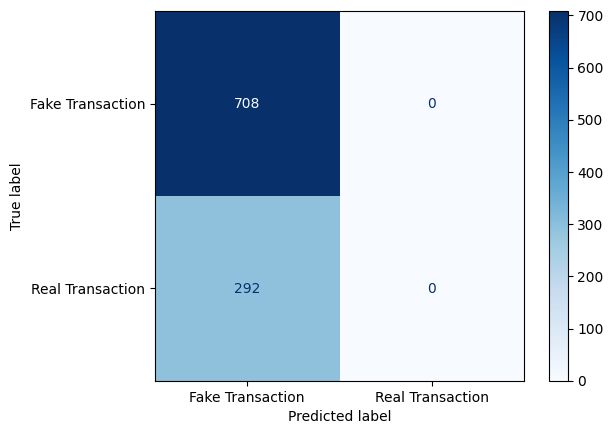

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model,
                                      x_test,
                                      y_test,
                                      display_labels=['Fake Transaction', 'Real Transaction'],
                                      cmap='Blues')

We have to optimize the parameters with cross validtion and gridsearchCV 

In [47]:
param_grid = [
    {'C' : [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},

]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(x_train_sample, y_train_sample)
print('Best Parameters:', optimal_params.best_params_)

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Now we will build and evaluate on this parameters

In [48]:
updated_model = SVC(random_state=42, C=100, gamma=0.001)
updated_model.fit(x_train_sample, y_train_sample)

,C,100
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [49]:
y_pred2 = updated_model.predict(x_test)
y_pred2 

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [50]:
print(f"Classification report: {classification_report(y_test, y_pred2)}")
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)}")


Classification report:               precision    recall  f1-score   support

           0       0.71      0.89      0.79       708
           1       0.29      0.11      0.16       292

    accuracy                           0.66      1000
   macro avg       0.50      0.50      0.47      1000
weighted avg       0.59      0.66      0.60      1000

Accuracy is: 0.661


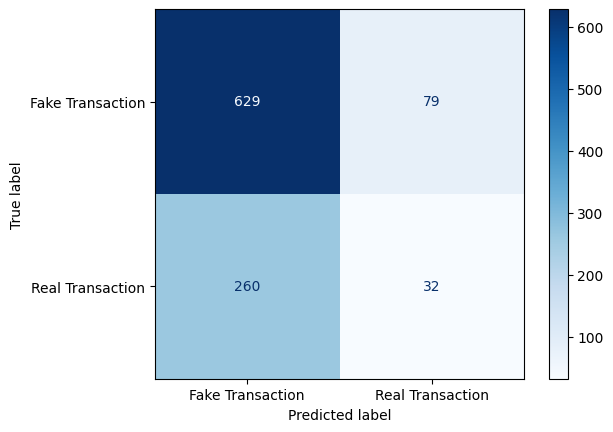

In [51]:
ConfusionMatrixDisplay.from_estimator(updated_model,
                                      x_test,
                                      y_test,
                                      display_labels=['Fake Transaction', 'Real Transaction'],
                                      cmap='Blues')

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


pipe = Pipeline([
    ('pca', PCA(n_components=0.95)),   # keep 95% variance
    ('svc', SVC())
])

param_grid = {
    'svc__C': [1, 10, 100],
    'svc__gamma': ['scale', 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', verbose=0)
grid.fit(x_train_sample, y_train_sample)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best score: 0.6644504091917481


- The SVM + PCA + SMOTE pipeline definitely improved overall balance (compared to your early results where class 0 = 0 % or 100 % predicted).

- But SVMs still tend to lean toward the majority side even after SMOTE; 0.66 accuracy with low minority recall is typical for this dataset type.

    
    So, this configuration is our best SVM so far.



In [58]:
print(f"Classification report: {classification_report(y_test, y_pred2)}")
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)}")


Classification report:               precision    recall  f1-score   support

           0       0.71      0.89      0.79       708
           1       0.29      0.11      0.16       292

    accuracy                           0.66      1000
   macro avg       0.50      0.50      0.47      1000
weighted avg       0.59      0.66      0.60      1000

Accuracy is: 0.661


In [59]:
pca = grid.best_estimator_.named_steps['pca']
print("Number of components:", pca.n_components_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


Number of components: 2
Total variance explained: 0.9983569631521444


In [63]:
df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [80]:
new_data = [0, 25, 3, 40000, 34218, 3,1.1, 1, 0, 0, 1, 0, 1]
new_data = np.array(new_data).reshape(1,-1) 

prediction = updated_model.predict(new_data)


if prediction ==1:
    print('Fake Transaction')
else:
    print('Real Transaction')

Real Transaction


In [81]:
import pickle 

with open('BankSVM_model.pkl', 'wb') as f: 
    pickle.dump(model,f) 